In [3]:
""" Proof of concept for the random-cut-hyperplanes idea """
import sys
import numpy as np
import time

from planes import *
# from iforest import *
from run import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
n_estimators = 200  # Get a somewhat stable approximation
SCORE_AT = 2.5

n = 1000  # number of entries
p = 30  # features

infection_pct = 0.05
X, y = gen_two_clusters(n, p, infection_pct)
#X, y = gen_hard_data(n, p, infection_pct)

anomalous_depths_r = list()
non_anomalous_depths_r = list()

anomalous_depths_i = list()
non_anomalous_depths_i = list()

anomalous_depths_rcf = list()
non_anomalous_depths_rcf = list()
t_r, t_i, t_rcf = 0, 0, 0

for i in range(1, 11):
    #if i % 10 == 0:
    print(f"Iteration number : {i}")
    start = time.time()
    scores_r, depths_r, y_pred_r, y_r, anom_r, non_anom_r = run_plane_simul(X, y, 
                                                                            n_estimators=n_estimators)
    stop = time.time()
    t_r = (t_r*(i-1) + (stop - start))/i
    start = stop
    scores_i, depths_i, y_pred_i, y_i, anom_i, non_anom_i = run_iforest_simul(X, y, n_estimators=n_estimators,
                                                                              method='iforest')
    stop = time.time()
    t_i = (t_i*(i-1) + (stop - start))/i
    start = stop
    scores_rcf, depths_rcf, y_pred_rcf, y_rcf, anom_rcf, non_anom_rcf = run_iforest_simul(X, y, 
                                                                                          n_estimators=n_estimators,
                                                                                          method='rcf')
    stop = time.time()
    t_rcf = (t_rcf*(i-1) + (stop - start))/i

    anomalous_depths_r.append(anom_r)
    non_anomalous_depths_r.append(non_anom_r)

    anomalous_depths_i.append(anom_i)
    non_anomalous_depths_i.append(non_anom_i)

    anomalous_depths_rcf.append(anom_rcf)
    non_anomalous_depths_rcf.append(non_anom_rcf)

print(f"For rhp anom/non_anom: {np.mean(anomalous_depths_r)}, {np.mean(non_anomalous_depths_r)}")
print(f"Time taken for rhp: {t_r}")
print(f"For iforest anom/non_anom: {np.mean(anomalous_depths_i)}, {np.mean(non_anomalous_depths_i)}")
print(f"Time taken for iForests: {t_i}")
print(f"For RCF anom/non_anom: {np.mean(anomalous_depths_rcf)}, {np.mean(non_anomalous_depths_rcf)}")
print(f"Time taken for rcf: {t_rcf}")

Iteration number : 1
Iteration number : 2
Iteration number : 3
Iteration number : 4
Iteration number : 5
Iteration number : 6
Iteration number : 7
Iteration number : 8
Iteration number : 9
Iteration number : 10
For rhp anom/non_anom: 7.0199, 17.76322373737374
Time taken for rhp: 11.844460058212281
For iforest anom/non_anom: 17.923150000000003, 18.168302525252525
Time taken for iForests: 53.051545119285585
For RCF anom/non_anom: 7.018600000000001, 17.41731868686869
Time taken for rcf: 94.1600346326828


In [44]:
rhp = RandomHyperplanes(n_estimators=N_ESTIMATORS)
rhp = rhp.fit(X)
depths = rhp.get_depths(X)

In [70]:
X, y = _gen_two_clusters(n, p, infection_pct, variance=0.25)
X_non = X[np.where(y == 0)]
X_anom = X[np.where(y == 1)]

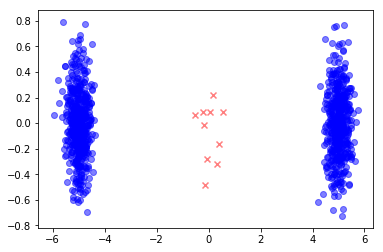

In [71]:
plt.scatter(X_non[:, 0], X_non[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_anom[:, 0], X_anom[:, 1], c='r', marker='x', alpha=0.5)
axes = plt.gca()
plt.show()

In [72]:
rhp = RandomHyperplanes(n_estimators=100)
rhp = rhp.fit(X)

In [73]:
scores = rhp.decision_function(X)

In [74]:
threshold = scoreatpercentile(scores, 97.5)

In [75]:
anomalies = np.zeros(shape=(n,))
anomalies[np.where(scores >= threshold)] = 1

In [76]:
X_non_p = X[np.where(anomalies == 0)]
X_anom_p = X[np.where(anomalies == 1)]

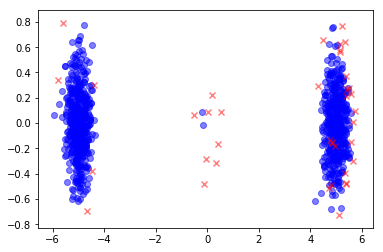

In [77]:
plt.scatter(X_non_p[:, 0], X_non_p[:, 1], c='b', marker='o', alpha=0.5)
plt.scatter(X_anom_p[:, 0], X_anom_p[:, 1], c='r', marker='x', alpha=0.5)
axes = plt.gca()
plt.show()

In [78]:
confusion_matrix(y, anomalies)

array([[959,  31],
       [  2,   8]])